# HW04: Nonparametric regression
## Sina Dadmand
### November 24, 2021

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Import

In [91]:
# generate random samples
data = np.genfromtxt("hw04_data_set.csv", delimiter= ",", skip_header= 1)

# separating test and train data
x_train = data[:150,0]
y_train = data[:150,1].astype(int)
x_test = data[150:,0]
y_test = data[150:,1].astype(int)


## Values

In [92]:
# values
origin = 1.5
bin_width = 0.37

max_x = max(x_train)

left_borders = np.arange(origin, max_x, bin_width)
right_borders = np.arange(origin + bin_width, max_x + bin_width, bin_width)
data_interval = np.arange(origin, max_x, 0.001)


# Regressogram

In [93]:

# defining regressogram
def regressogram(ind):
    sums = 0
    cnt = 0
    for i in range(x_train.shape[0]):
        if(left_borders[ind] < x_train[i] and x_train[i] <= right_borders[ind]):
            sums +=  y_train[i]
            cnt += 1
    val = sums / cnt
    return val

p_hat = [regressogram(i) for i in range(left_borders.shape[0])]



# Plot


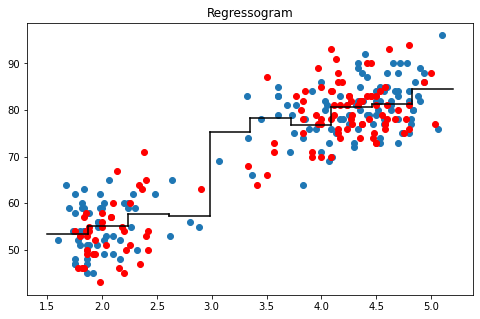

In [94]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="red")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")    
plt.title("Regressogram")
plt.show()

# RMSE

In [95]:
rmse = 0
for i in range(0,len(x_test)):
    for j in range(0,len(left_borders)):
        if(left_borders[j] < x_test[i] and x_test[i] <= right_borders[j]):
            err = (y_test[i] - p_hat[int((x_test[i]-origin)/bin_width)])**2
            rmse += err
result = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is", result, " when h is", bin_width)

Regressogram => RMSE is 5.962617204275407  when h is 0.37


# Mean Smoother

In [96]:
def mean_smoother(ind):
    sums = 0
    cnt = 0
    for i in range(x_train.shape[0]):
        if(np.abs((data_interval[ind]-x_train[i])/bin_width) < 0.5):
            sums +=  y_train[i]
            cnt += 1
    val = sums / cnt
    return val

p_hat_msm = np.array([mean_smoother(i) for i in range(data_interval.shape[0])])

# Plot

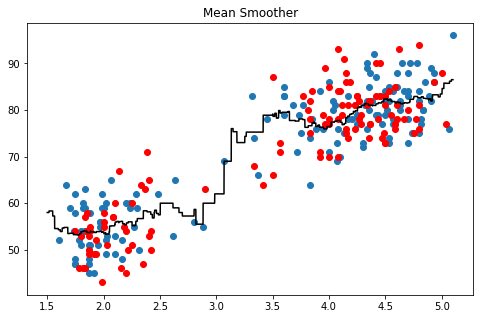

In [101]:
p_hat_msm = np.array([mean_smoother(i) for i in range(data_interval.shape[0])])

plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="red")
plt.plot(data_interval, p_hat_msm, "k")
plt.title("Mean Smoother")
plt.show()

# RMSE calculation

In [102]:
err = [(y_test[i] - p_hat_msm[int((x_test[i]-origin)*1000)])**2 for i in range(len(x_test))]
rmse = np.sqrt(np.sum(err) / len(x_test))
print("Mean Smoother => RMSE is", rmse, " when h is", bin_width)


Mean Smoother => RMSE is 6.085457746924621  when h is 0.37


# Kernel smoother

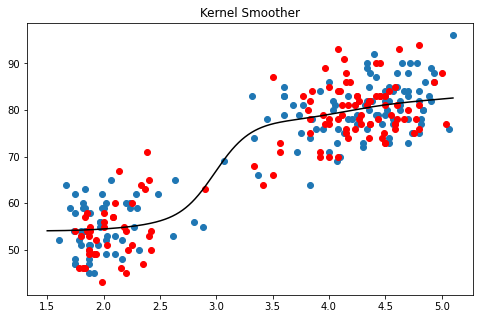

In [103]:
def kernel_smoother(ind):
    sums = 0
    cnt = 0
    for i in range(0,len(x_train)):
        x = (data_interval[ind] - x_train[i]) / bin_width
        g = 1/np.sqrt(2* np.pi) * np.exp(-1* x ** 2 / 2)
        cnt += g
        sums += (g * y_train[i])
        
    val = sums / cnt
    return val

p_hat_kernel_smth = np.array([kernel_smoother(i) for i in range(data_interval.shape[0])])
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="red")
plt.plot(data_interval, p_hat_kernel_smth, "k")
plt.title("Kernel Smoother")
plt.show()

# RMSE

In [104]:
err = [(y_test[i] - p_hat_kernel_smth[int((x_test[i]-origin)*1000)])**2 for i in range(len(x_test))]
rmse = np.sqrt(np.sum(err) / len(x_test))
print("Kernel Smoother => RMSE is", rmse, " when h is", bin_width)

Kernel Smoother => RMSE is 5.874019808179156  when h is 0.37
